In [98]:
#Import all Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components
rcParams['figure.figsize']=(15,5)
import seaborn as sns
import os

In [99]:
#Change Directory to Root Directory
os.chdir("C:\\Users\\sowmy\\Downloads")

In [100]:
#Import File
House_DS=pd.read_csv("House Price Time Series.csv")

In [101]:
#Check Null Values
House_DS.isna().sum()

saledate    0
Price       0
type        0
bedrooms    0
dtype: int64

In [102]:
#Check Duplicates
House_DS.duplicated().sum()

0

In [103]:
#Perform Basic Analysis on Data Set

In [104]:
House_DS.describe()

,Price,bedrooms
count,3.470000e+02,347.000000
mean,5.481320e+05,2.867435
std,1.701934e+05,1.239875
min,3.167510e+05,1.000000
25%,4.277395e+05,2.000000
50%,5.077440e+05,3.000000
75%,6.275155e+05,4.000000
max,1.017752e+06,5.000000


In [105]:
House_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   saledate  347 non-null    object
 1   Price     347 non-null    int64 
 2   type      347 non-null    object
 3   bedrooms  347 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.0+ KB


In [106]:
House_DS['saledate']=pd.to_datetime(House_DS['saledate'])

C:\Users\sowmy\AppData\Local\Temp\ipykernel_5500\1098843198.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [107]:
House_DS['saledate'].dtypes

dtype('<M8[ns]')

In [108]:
House_DS

,saledate,Price,type,bedrooms
0,2007-09-30,441854,house,2
1,2007-12-31,441854,house,2
2,2008-03-31,441854,house,2
3,2008-06-30,441854,house,2
4,2008-09-30,451583,house,2
...,...,...,...,...
342,2018-09-30,603281,unit,3
343,2018-12-31,601167,unit,3
344,2019-03-31,605637,unit,3
345,2019-06-30,599339,unit,3


In [109]:
#Perform Data  Analysis and Visualisation on Sales Data

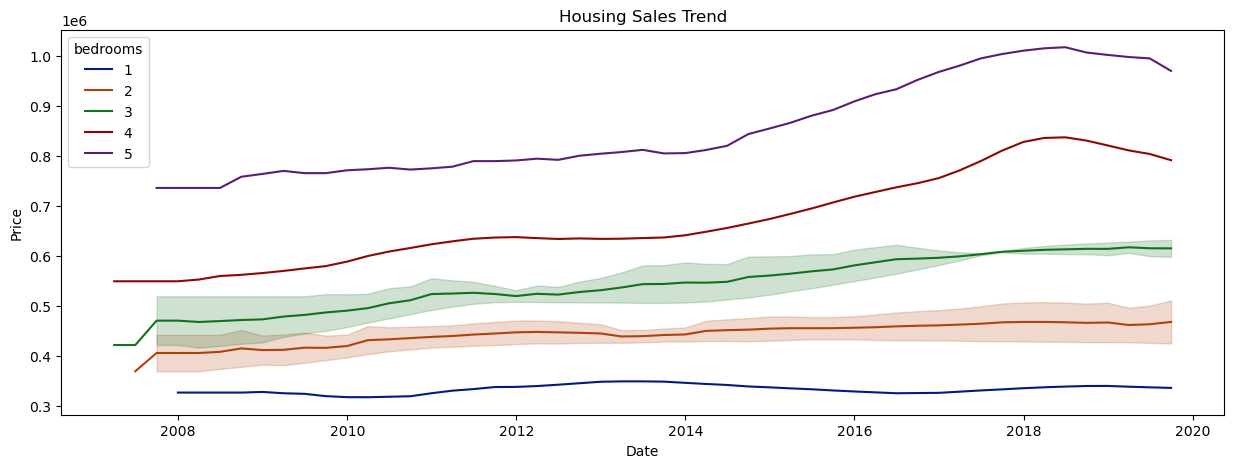

In [114]:
sns.lineplot(x=House_DS['saledate'],y=House_DS['Price'],palette='dark',hue=House_DS['bedrooms'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Housing Sales Trend")
plt.show()

In [22]:
House_Type=House_DS['type'].value_counts()

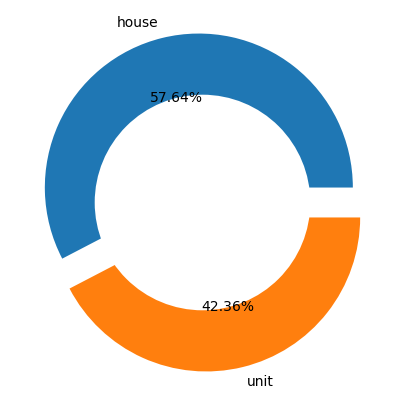

In [112]:
plt.pie(x=House_Type,labels=House_Type.index,autopct='%1.2f%%',explode=(0.1,.1))
Inner_Circle=plt.Circle((0,0),.7,fc='w')
plt.gca().add_artist(Inner_Circle)
plt.show()

In [23]:
Total_Bedrooms=House_DS['bedrooms'].value_counts()

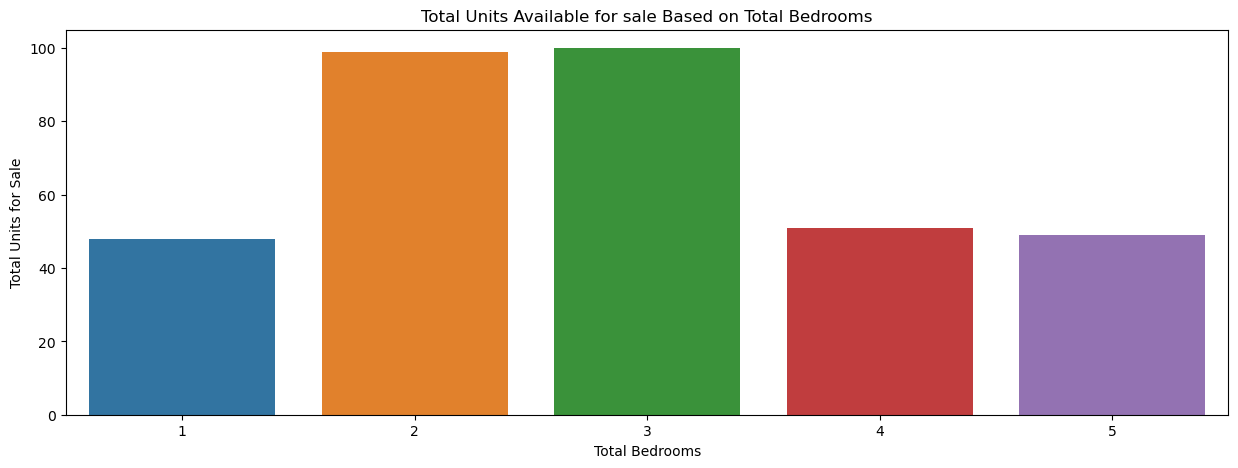

In [37]:
sns.barplot(y=Total_Bedrooms,x=Total_Bedrooms.index)
plt.xlabel("Total Bedrooms")
plt.ylabel("Total Units for Sale")
plt.title("Total Units Available for sale Based on Total Bedrooms")
plt.show()

In [38]:
Type=House_DS['type'].value_counts()

In [25]:
House_DS['type'].value_counts()

type
house    200
unit     147
Name: count, dtype: int64

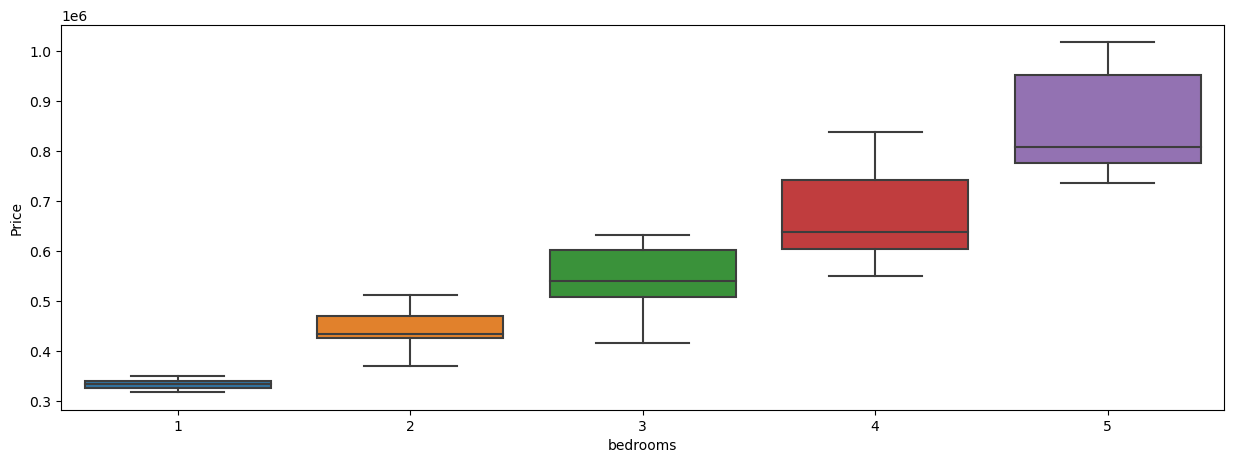

In [46]:
sns.boxplot(y=House_DS['Price'],x=House_DS['bedrooms'])
plt.show()

In [48]:
House_DS.head()

,saledate,Price,type,bedrooms
0,2007-09-30,441854,house,2
1,2007-12-31,441854,house,2
2,2008-03-31,441854,house,2
3,2008-06-30,441854,house,2
4,2008-09-30,451583,house,2


In [ ]:
#Extrate Momth and Year for Analysis

In [50]:
House_DS['Month']=House_DS['saledate'].dt.month

In [51]:
House_DS['Year']=House_DS['saledate'].dt.year

In [52]:
House_DS

,saledate,Price,type,bedrooms,Month,Year
0,2007-09-30,441854,house,2,9,2007
1,2007-12-31,441854,house,2,12,2007
2,2008-03-31,441854,house,2,3,2008
3,2008-06-30,441854,house,2,6,2008
4,2008-09-30,451583,house,2,9,2008
...,...,...,...,...,...,...
342,2018-09-30,603281,unit,3,9,2018
343,2018-12-31,601167,unit,3,12,2018
344,2019-03-31,605637,unit,3,3,2019
345,2019-06-30,599339,unit,3,6,2019


In [55]:
House_DS=House_DS.rename(columns={'saledate':'ds','Price':'y'})

In [56]:
House_DS

,ds,y,type,bedrooms,Month,Year
0,2007-09-30,441854,house,2,9,2007
1,2007-12-31,441854,house,2,12,2007
2,2008-03-31,441854,house,2,3,2008
3,2008-06-30,441854,house,2,6,2008
4,2008-09-30,451583,house,2,9,2008
...,...,...,...,...,...,...
342,2018-09-30,603281,unit,3,9,2018
343,2018-12-31,601167,unit,3,12,2018
344,2019-03-31,605637,unit,3,3,2019
345,2019-06-30,599339,unit,3,6,2019


In [ ]:
#Apply Model

In [59]:
model=Prophet()

In [60]:
model.fit(House_DS)

21:34:00 - cmdstanpy - INFO - Chain [1] start processing
21:34:00 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
Forecast=model.make_future_dataframe(periods=730)

In [70]:
predicted=model.predict(Forecast)

In [71]:
predicted

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-03-31,437068.507640,265418.920309,676048.553799,437068.507640,437068.507640,32202.777539,32202.777539,32202.777539,32202.777539,32202.777539,32202.777539,0.0,0.0,0.0,469271.285179
1,2007-06-30,440140.191950,265229.567966,676953.331493,440140.191950,440140.191950,30411.317632,30411.317632,30411.317632,30411.317632,30411.317632,30411.317632,0.0,0.0,0.0,470551.509582
2,2007-09-30,443245.631033,275927.396087,695360.996896,443245.631033,443245.631033,33078.157618,33078.157618,33078.157618,33078.157618,33078.157618,33078.157618,0.0,0.0,0.0,476323.788651
3,2007-12-31,446351.070116,280169.197640,689874.286966,446351.070116,446351.070116,31890.496974,31890.496974,31890.496974,31890.496974,31890.496974,31890.496974,0.0,0.0,0.0,478241.567089
4,2008-03-31,449422.754939,272755.658899,697267.256312,449422.754939,449422.754939,31791.892709,31791.892709,31791.892709,31791.892709,31791.892709,31791.892709,0.0,0.0,0.0,481214.647648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,2021-09-25,615704.020829,434226.049268,884106.798382,615703.947622,615704.093545,31149.954018,31149.954018,31149.954018,31149.954018,31149.954018,31149.954018,0.0,0.0,0.0,646853.974847
777,2021-09-26,615737.776989,430936.764524,871646.576624,615737.703612,615737.849972,32256.354578,32256.354578,32256.354578,32256.354578,32256.354578,32256.354578,0.0,0.0,0.0,647994.131568
778,2021-09-27,615771.533150,454240.422479,854178.300909,615771.459602,615771.606387,32980.741075,32980.741075,32980.741075,32980.741075,32980.741075,32980.741075,0.0,0.0,0.0,648752.274225
779,2021-09-28,615805.289310,440221.853345,852059.332542,615805.215591,615805.362808,33314.248628,33314.248628,33314.248628,33314.248628,33314.248628,33314.248628,0.0,0.0,0.0,649119.537938


In [72]:
plot_plotly(model,predicted)

In [81]:
predicted['ds']

0     2007-03-31
1     2007-06-30
2     2007-09-30
3     2007-12-31
4     2008-03-31
         ...    
776   2021-09-25
777   2021-09-26
778   2021-09-27
779   2021-09-28
780   2021-09-29
Name: ds, Length: 781, dtype: datetime64[ns]

In [86]:
predicted[['ds','trend']].to_excel('Projections.xlsx')

In [87]:
Forecast=pd.DataFrame(predicted[['ds','trend']])

In [89]:
Forecast['ds'].dtypes

dtype('<M8[ns]')

In [90]:
Forecast=Forecast.set_index('ds')

In [94]:
Forecast=Forecast.resample('m').mean().dropna()

In [96]:
Forecast.to_excel("Forecast.xlsx")